# Building Machine Learning Pipelines: Data Analysis Phase

In this and the upcoming videos we will focus on creating Machine Learning Pipelines considering all the life cycle of a Data Science Projects. This will be important for professionals who have not worked with huge dataset.

## Project Name: House Prices: Advanced Regression Techniques

The main aim of this project is to predict the house price based on various features which we will discuss as we go ahead

#### Dataset to downloaded from the below link
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

### All the Lifecycle In A Data Science Projects 
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

### Contents 
1. Data Analysis aka EDA ( Exploratory Data Analysis )
    a.   Missing Values
              i)   Explore how missing values affect our data
              ii)  Check relationship of missing values features and the dependent feature ( SalePrice ) using BARPLOT

    b.   Numerical Variables
              i)   Explore numerical features in our data
              ii)  Explore Temporal Variable ( Eg : Datetime )
              iii) Types of Numerical Variables
              iv)  Distribution of Numerical Variables in our data
              v)   Log Transformation of Variable
              
    c.   Categorical Variables and its cardinality  
              i)   Explore categorical features in our data
              ii)  Relationship between Categorical Variables and dependent feature
              
    d.   Outliers 


# 1. Data Analysis : To understand the given data

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.pandas.set_option('display.max_columns',None) # display all columns in dataframe
pd.set_option("display.max_rows",None)

In [2]:
#Importing Dataset
data = pd.read_csv('train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.shape # 80 features with 1459 records

(1460, 81)

###### In Data Analysis, we will analyze below :
1. Missing Values
2. Numerical Variables and its distribution + Temporal Variable ( Datetime )
3. Categorical Variables and its cardinality  
4. Outliers  
5. Relationship between independent variables and dependent variable  

## 1) a. Missing Values

1. Data Analysis aka EDA ( Exploratory Data Analysis )  
    a.   Missing Values
              i)   Explore how missing values affect our data

In [5]:
data.isnull().sum().any # We can see many features have NAN or null values

<bound method Series.any of Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndF

In [6]:
#Lets first make list of feature which have NAN values
features_with_na = [features for features in data.columns if data[features].isnull().sum() > 1]
features_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [7]:
data[features_with_na].isnull().sum() #Here is the list and its number of NAN values

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
#Lets see the percentage 
for feature in features_with_na:
    if feature in ["Alley","PoolQC","Fence"]:
        print(feature,"\t\t\t",(np.round(data[feature].isnull().mean(),1)*100), '\t','% missing values')
    else:
        print(feature, "\t\t",(np.round(data[feature].isnull().mean(),1)*100), '\t','% missing values')

LotFrontage 		 20.0 	 % missing values
Alley 			 90.0 	 % missing values
MasVnrType 		 0.0 	 % missing values
MasVnrArea 		 0.0 	 % missing values
BsmtQual 		 0.0 	 % missing values
BsmtCond 		 0.0 	 % missing values
BsmtExposure 		 0.0 	 % missing values
BsmtFinType1 		 0.0 	 % missing values
BsmtFinType2 		 0.0 	 % missing values
FireplaceQu 		 50.0 	 % missing values
GarageType 		 10.0 	 % missing values
GarageYrBlt 		 10.0 	 % missing values
GarageFinish 		 10.0 	 % missing values
GarageQual 		 10.0 	 % missing values
GarageCond 		 10.0 	 % missing values
PoolQC 			 100.0 	 % missing values
Fence 			 80.0 	 % missing values
MiscFeature 		 100.0 	 % missing values


Clearly features : Alley, PoolQC, Fence and MiscFeature ( missing % > 80 ) can be dropped easily which can be done in feature engineering phase. Here we are just analysing

### 1) a. ii. Lets check the relationship between missing values and sales price (Depend Variable) 

1. Data Analysis aka EDA ( Exploratory Data Analysis )  
    a.   Missing Values  
              i)   Explore how missing values affect our data
              ii)  Check relationship of missing values features and the dependent feature ( SalePrice ) using BARPLOT

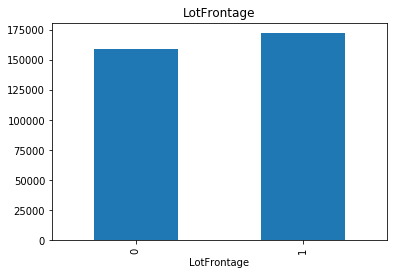

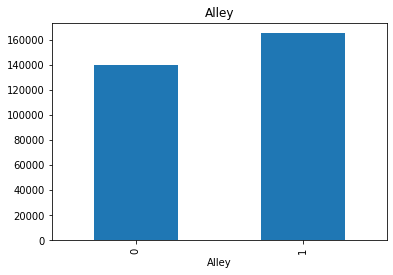

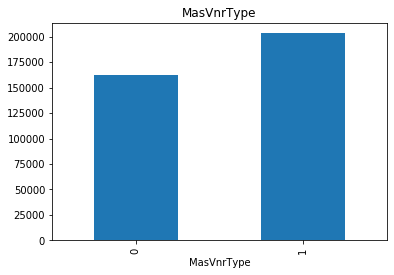

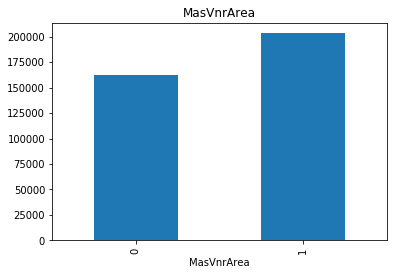

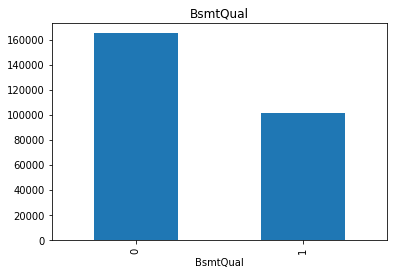

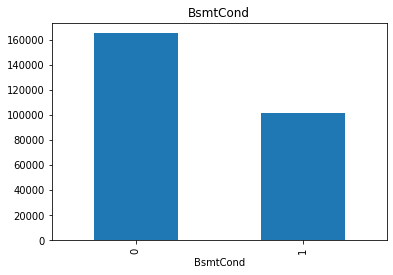

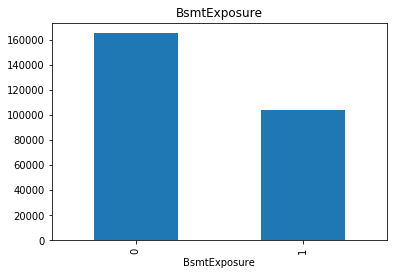

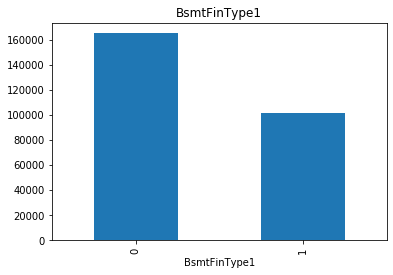

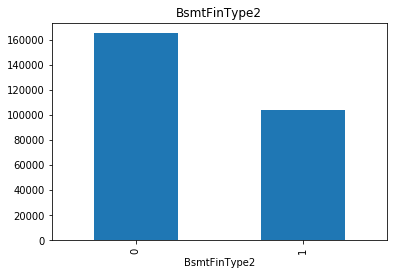

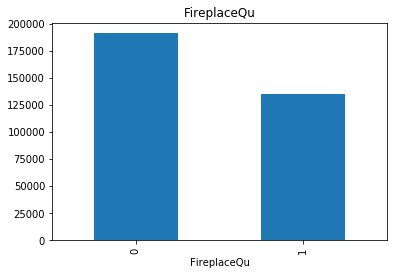

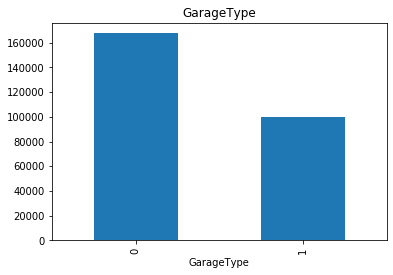

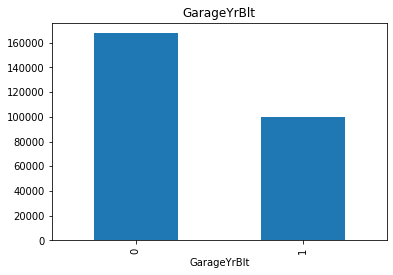

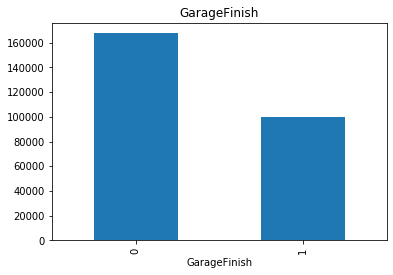

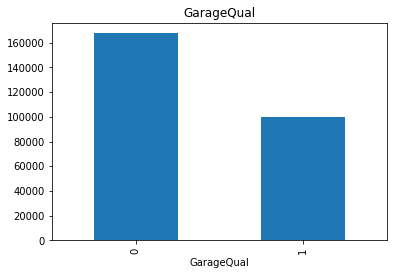

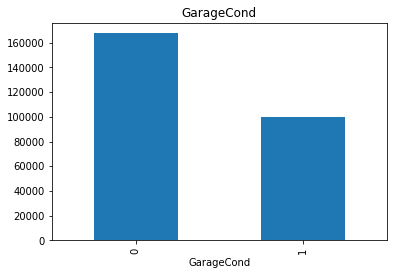

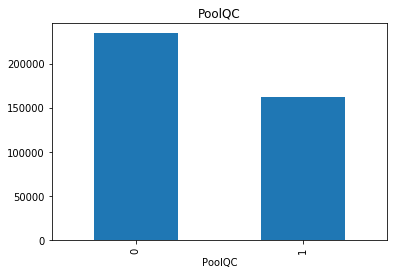

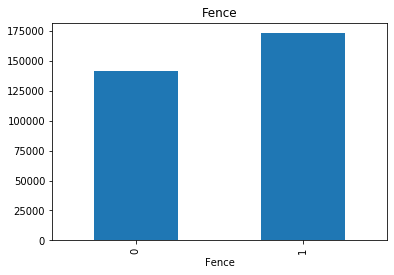

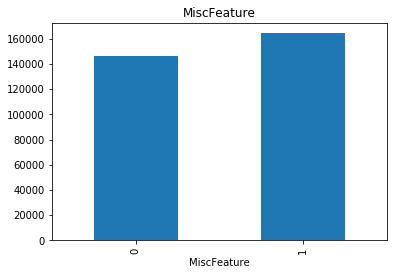

In [9]:
# #Lets visualize relationship of every feature with Sales price in bar plot
for feature in features_with_na:
    dataset = data.copy()
    
    dataset[feature] = np.where(data[feature].isnull(),1,0) # 1 is for null value and 0 is for non-null values
    dataset.groupby(feature)['SalePrice'].median().plot.bar()
    
    plt.title(feature)
    plt.show()

Observation :
1. We can see the dependent variable ( SalePrice ) has good relationship with features even though there are missing values.
For example : Fence feature has 80% missing values , yet we can see there are many 1 values as per bar.

2. Hence, we need to replace the given missing values with meaningful values which we will take care in FEATURE ENGINEERING phase.

## 1) b. Numerical Variables

 b.   Numerical Variables  
              i)   Explore numerical features in our data

In [10]:
print(data['SalePrice'].dtypes," and ",data['Fence'].dtypes)

int64  and  object


In [11]:
#Let get the list of numerical variables
numerical_feature = [feature for feature in data.columns if data[feature].dtypes !='object']

In [12]:
numerical_feature1 = [feature for feature in data.columns if data[feature].dtypes !='O']

In [13]:
if(numerical_feature == numerical_feature1):
    print("Same")
else:
    print("Different")

Same


In [14]:
print("Number of Numerical Features : ",len(numerical_feature))
print("Number of Non-numerical Features : ",(data.shape[1]-len(numerical_feature)))

Number of Numerical Features :  38
Number of Non-numerical Features :  43


In [15]:
data[numerical_feature].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [16]:
data[numerical_feature].shape

(1460, 38)

#### Temporal Variable ( Eg : Datetime Variable ) 

b.   Numerical Variables  
              i)   Explore numerical features in our data  
              ii)  Handle Temporal Variable ( Eg : Datetime )  

We notice inside numerical varible there are number of date columns which is datetime variable. 
Lets identify those columns and handle it

In [17]:
year_feature = [feature for feature in numerical_feature if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [18]:
data[year_feature].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


In [19]:
#Lets see the unique years in yearfeature
for feature in year_feature:
    print(feature,"\n",data[feature].unique())

YearBuilt 
 [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd 
 [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt 
 [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962.

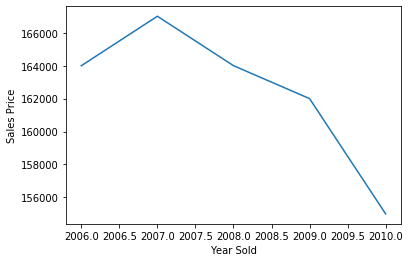

In [20]:
#Lets analyze deeper for relationship between year house sold and sales price
data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel("Year Sold")
plt.ylabel("Sales Price")
plt.show()

We observe that as the year sold increases, salesprice decreases.In real life, when we sell house later, we yield more price.

In [21]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

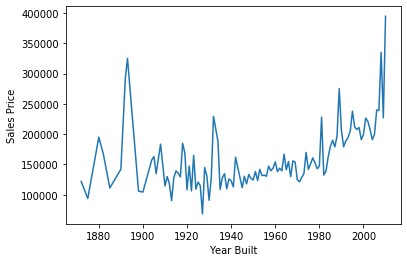

In [22]:
#Lets analyze deeper for relationship between year built and sales price
data.groupby('YearBuilt')['SalePrice'].median().plot()
plt.xlabel("Year Built")
plt.ylabel("Sales Price")
plt.show()

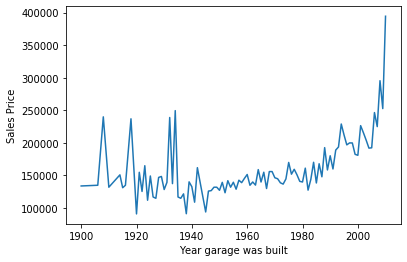

In [23]:
#Lets analyze deeper for relationship between year built and sales price
data.groupby('GarageYrBlt')['SalePrice'].median().plot()
plt.xlabel("Year garage was built")
plt.ylabel("Sales Price")
plt.show()

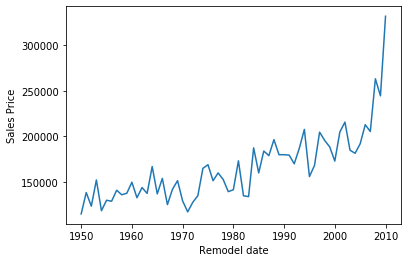

In [24]:
#Lets analyze deeper for relationship between year built and sales price
data.groupby('YearRemodAdd')['SalePrice'].median().plot()
plt.xlabel("Remodel date")
plt.ylabel("Sales Price")
plt.show()

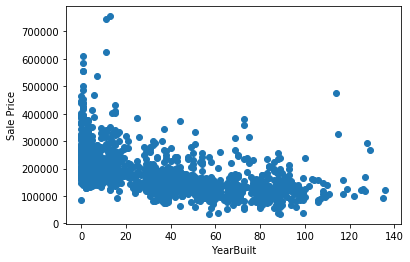

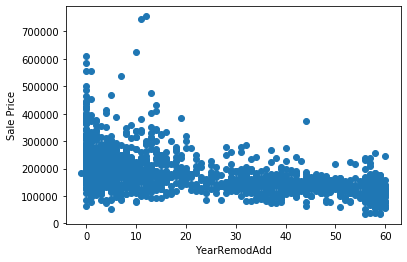

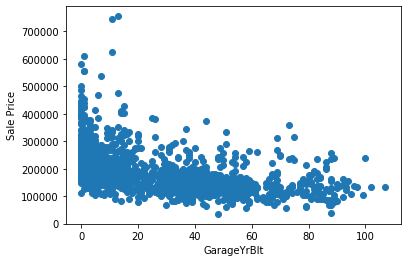

In [25]:
#Lets see the difference between all year feature with sales price

for feature in year_feature:
    if feature != 'YrSold':
        dataset = data.copy()
        
        dataset[feature]= dataset['YrSold'] - dataset[feature]
        
        plt.scatter(dataset[feature],dataset['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Sale Price')
        plt.show()

Observations :
1. Year Built vs Sales Price : From 0 to 20 years interval of year built and year sold , the sales price is higher.
2. Year Remodel vs Sales Price : From 10 to 20 years interval of year remodel and year sold, the sales price is higher.

1) b.   Numerical Variables  
              i)   Explore numerical features in our data  
              ii)  Handle Temporal Variable ( Eg : Datetime )  
              iii) Types of Numerical Variables  

Types of Numerical Variables :
1. Discrete Variable
2. Continous Variable

#### Discrete Variable

In [26]:
discrete_feature = [feature for feature in numerical_feature 
                    if len(data[feature].unique())<25 and 
                    feature not in year_feature+['Id']]

In [27]:
print("Count of discrete features : {}".format(len(discrete_feature)))

Count of discrete features : 17


In [28]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [29]:
data[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


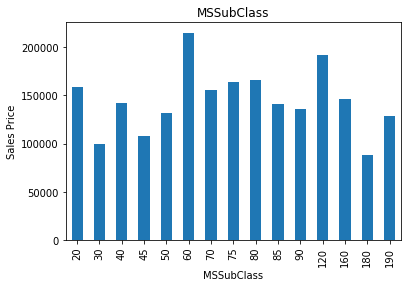

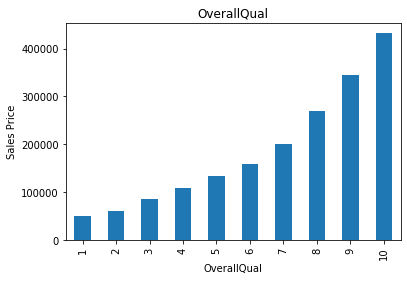

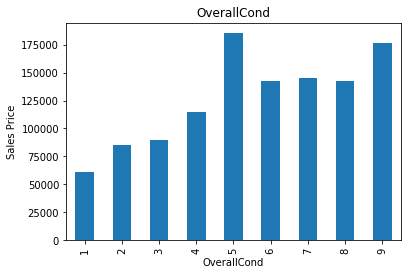

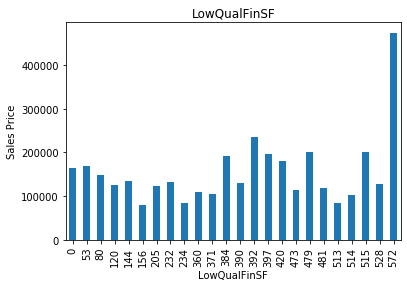

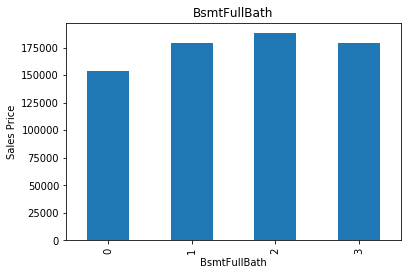

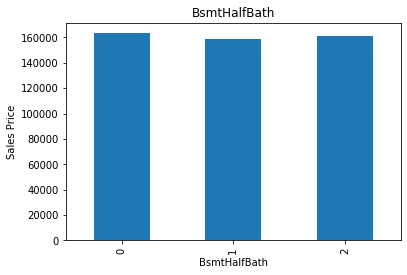

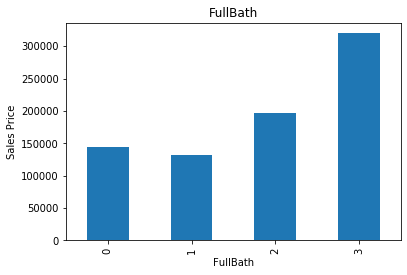

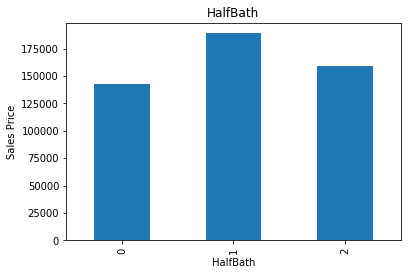

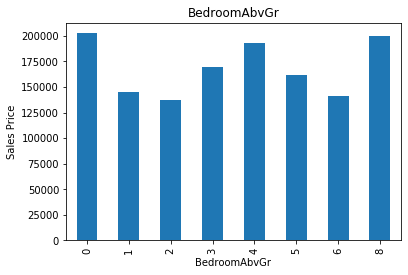

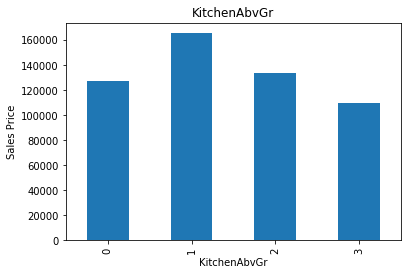

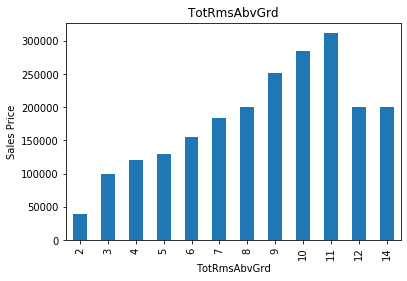

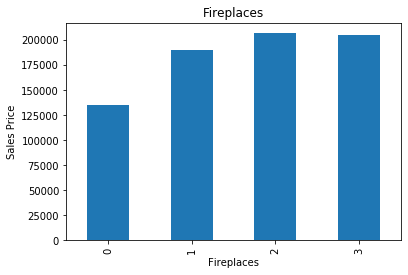

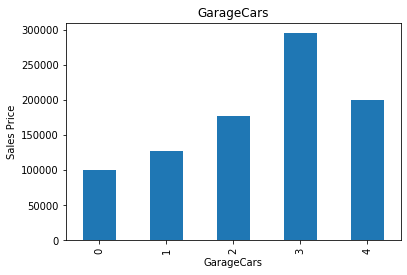

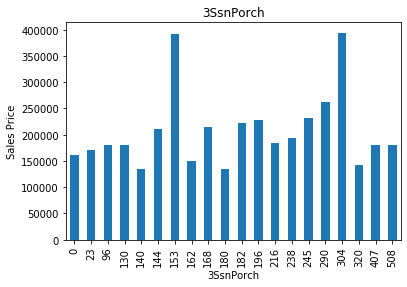

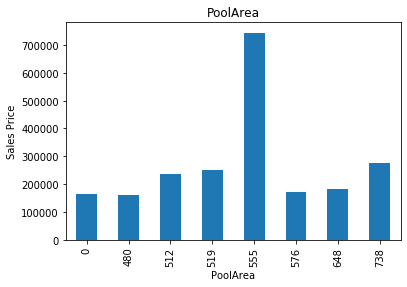

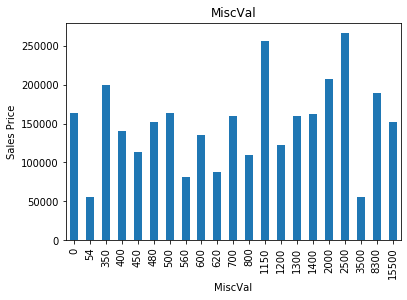

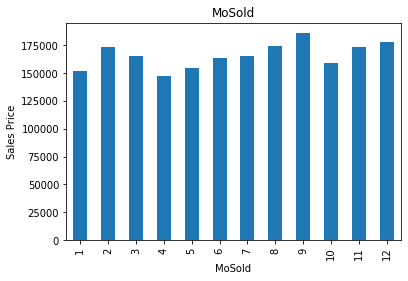

In [30]:
#Relationship between discrete feature and sales price
for feature in discrete_feature:
    dataset = data.copy()
    
    dataset.groupby(feature)['SalePrice'].median().plot.bar()
    
    plt.xlabel(feature)
    plt.ylabel('Sales Price')
    plt.title(feature)
    plt.show()

Hence, there is deep relationship between discrete features and sales price dependent feature.

#### Continous Variable

In [31]:
continous_feature = [feature for feature in numerical_feature if feature not in discrete_feature+year_feature+['Id']]
print("Continous_features : \n {} \n".format(continous_feature))
print("Count : {} \n".format(len(continous_feature)))

Continous_features : 
 ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice'] 

Count : 16 



In [32]:
data[continous_feature].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


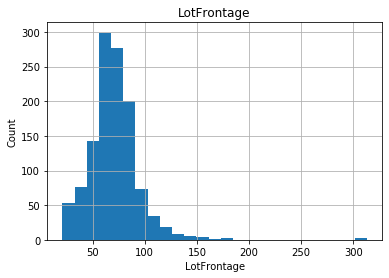

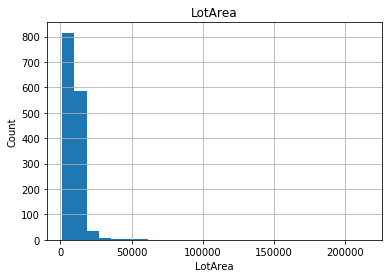

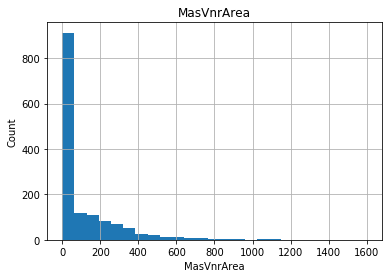

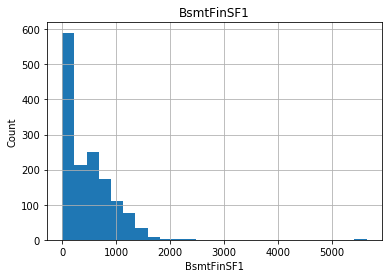

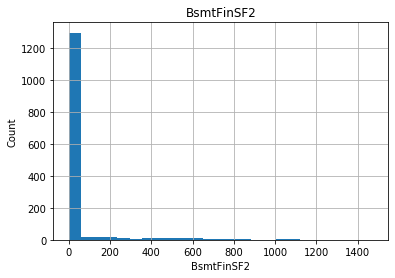

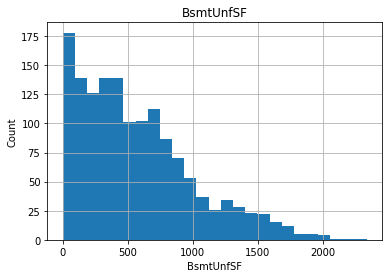

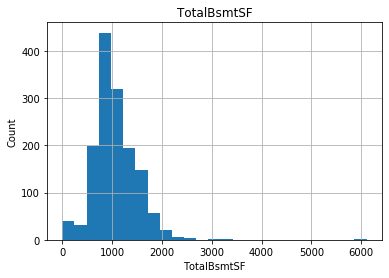

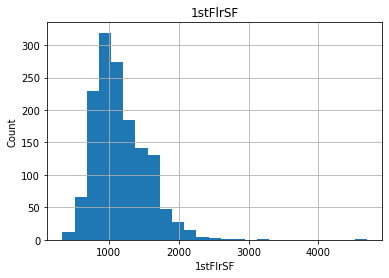

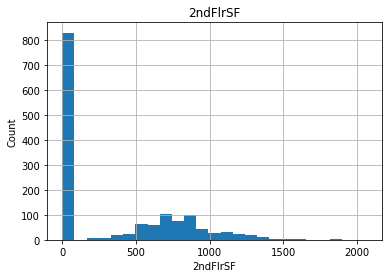

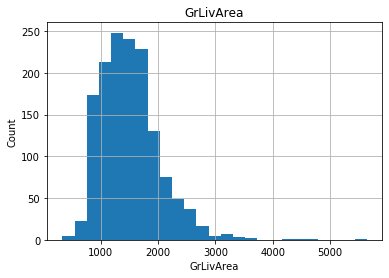

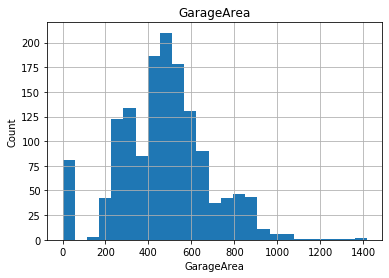

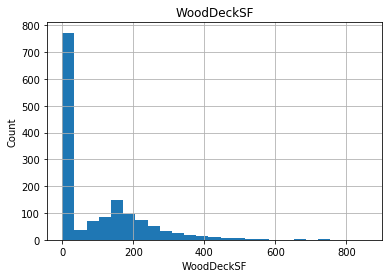

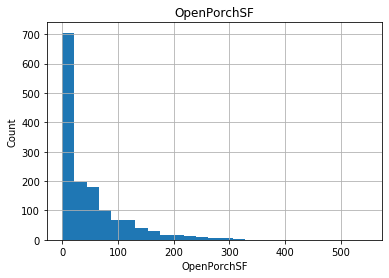

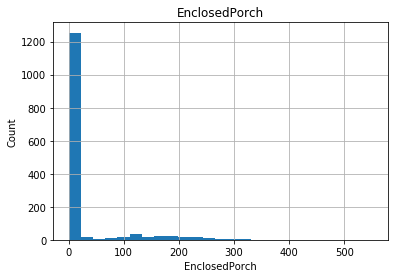

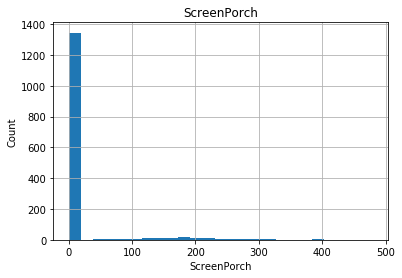

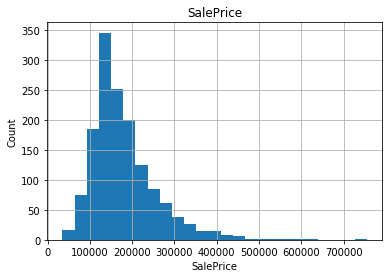

In [33]:
#To understand continous values we will create histograms
for feature in continous_feature:
    dataset = data.copy()
    
    dataset[feature].hist(bins=25)
    
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

b.   Numerical Variables  
    i)   Explore numerical features in our data  
    ii)  Handle Temporal Variable ( Eg : Datetime )  
    iii) Types of Numerical Variables  
    iv)  Distribution of Numerical Variables in our data  
    v)   Log Transformation of Variable

We have seen the distribution of continous and discrete feature with repsect to sales price. 

Now for continous variable, we need to apply logarithmic transformation for future scaling

In [44]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


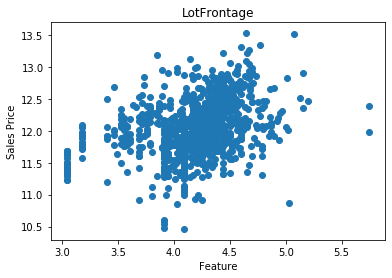

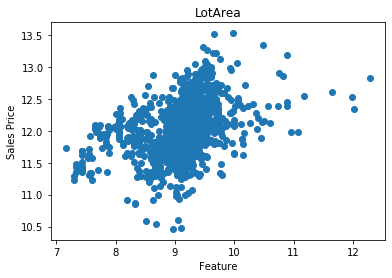

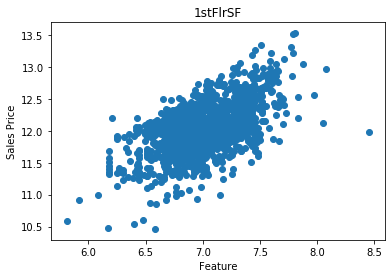

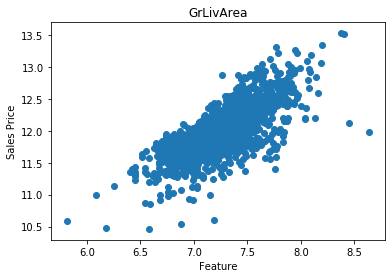

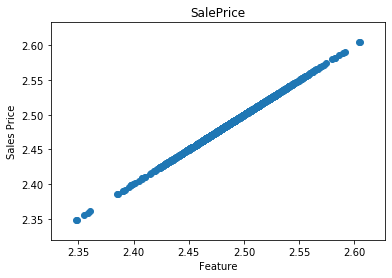

In [39]:
for feature in continous_feature:
    dataset = data.copy()
    
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature] = np.log(dataset[feature])
        dataset['SalePrice'] = np.log(dataset['SalePrice'])
        plt.scatter(dataset[feature],dataset['SalePrice'])
        
        plt.xlabel("Feature")
        plt.ylabel("Sales Price")
        plt.title(feature)
        plt.show()

## 1. c.   Categorical Variables and its cardinality  

In [50]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']

In [54]:
print("Categorical Features : \n{}".format(categorical_features))
print("\n Count  : {}".format(len(categorical_features)))

Categorical Features : 
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

 Count  : 43


In [55]:
data[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [64]:
#Lets find the category count 
for feature in categorical_features:
    print(" Feature : {} \n Count of categories : {}\n Categories : {}\n".format(feature,len(data[feature].unique()),data[feature].unique()))

 Feature : MSZoning 
 Count of categories : 5
 Categories : ['RL' 'RM' 'C (all)' 'FV' 'RH']

 Feature : Street 
 Count of categories : 2
 Categories : ['Pave' 'Grvl']

 Feature : Alley 
 Count of categories : 3
 Categories : [nan 'Grvl' 'Pave']

 Feature : LotShape 
 Count of categories : 4
 Categories : ['Reg' 'IR1' 'IR2' 'IR3']

 Feature : LandContour 
 Count of categories : 4
 Categories : ['Lvl' 'Bnk' 'Low' 'HLS']

 Feature : Utilities 
 Count of categories : 2
 Categories : ['AllPub' 'NoSeWa']

 Feature : LotConfig 
 Count of categories : 5
 Categories : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

 Feature : LandSlope 
 Count of categories : 3
 Categories : ['Gtl' 'Mod' 'Sev']

 Feature : Neighborhood 
 Count of categories : 25
 Categories : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'

#### Relationship between categorical feature and dependent feature (SALE PRICE)

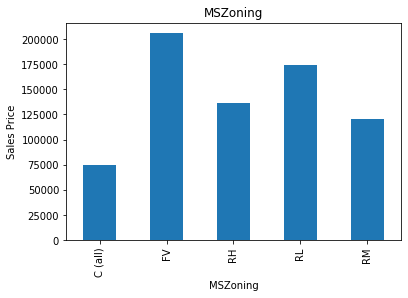

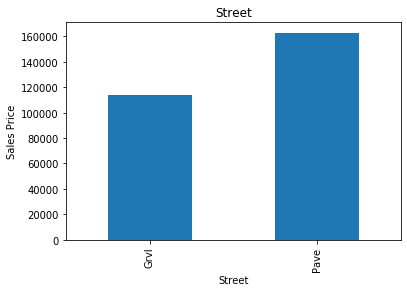

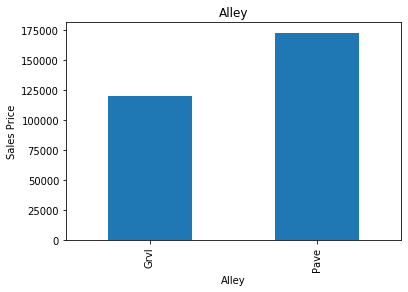

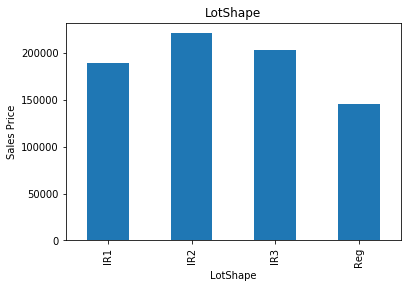

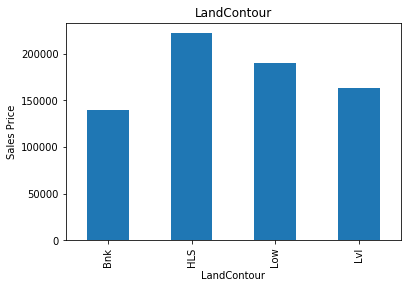

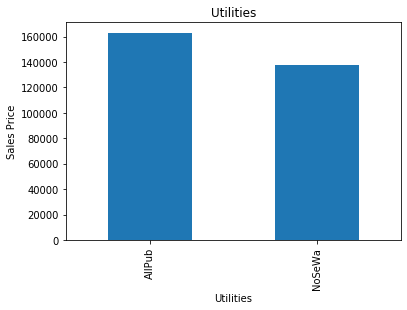

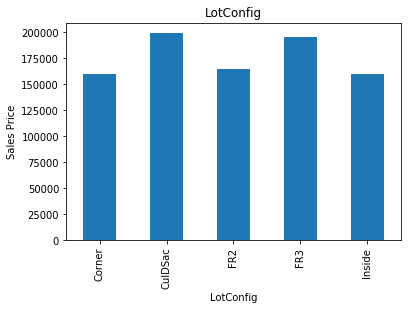

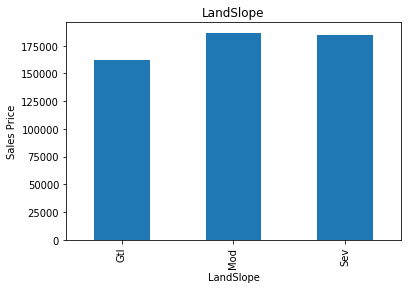

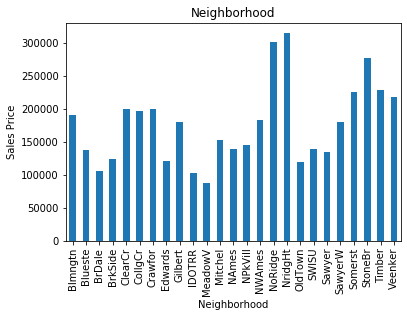

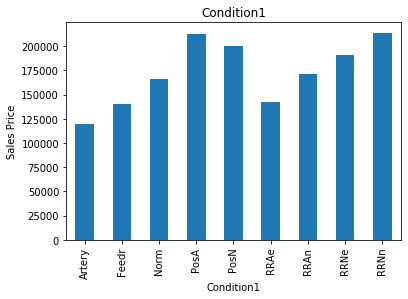

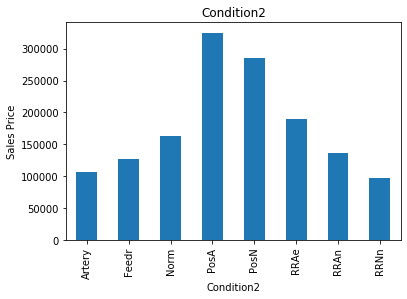

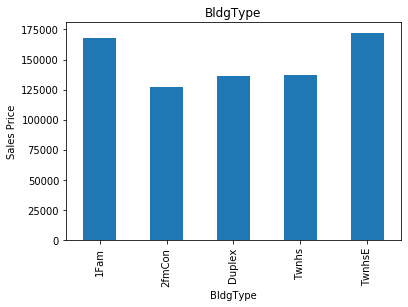

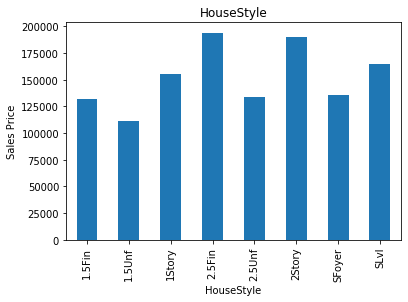

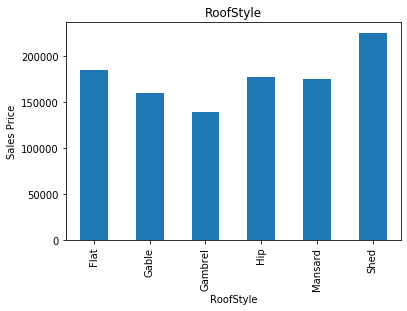

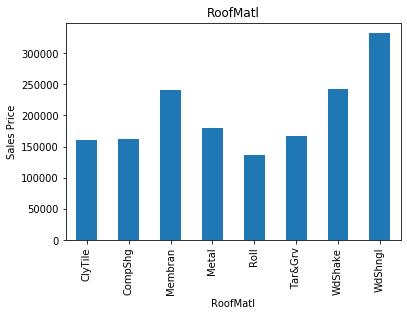

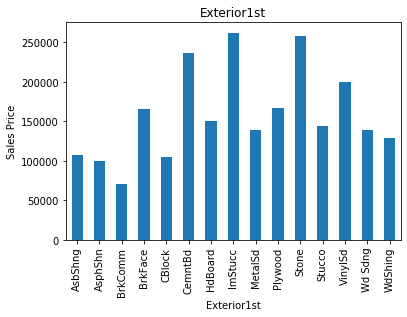

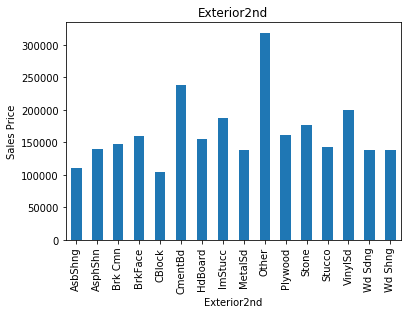

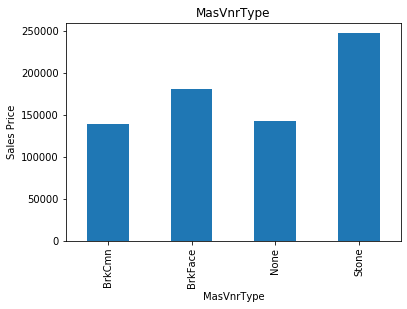

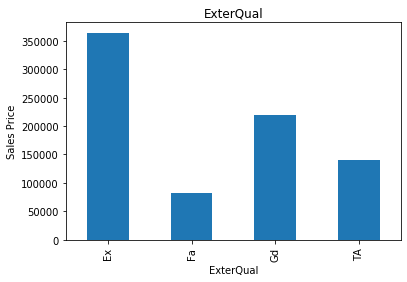

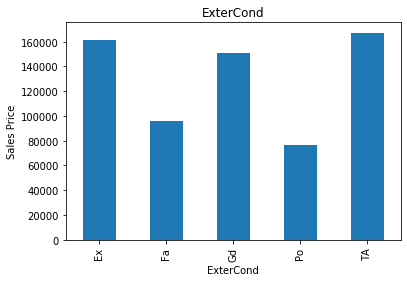

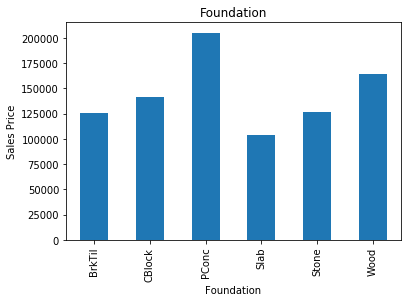

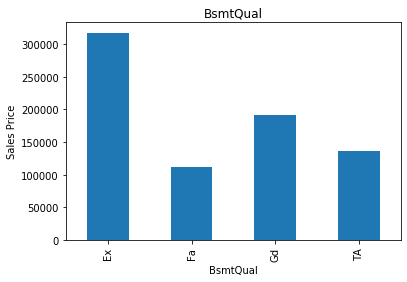

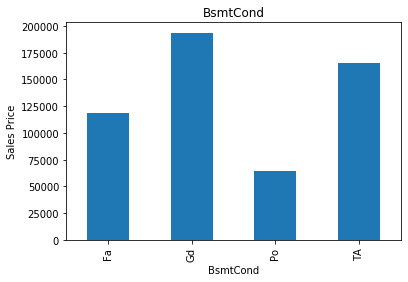

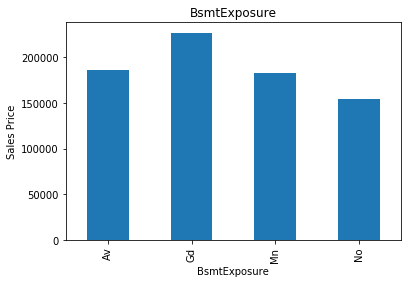

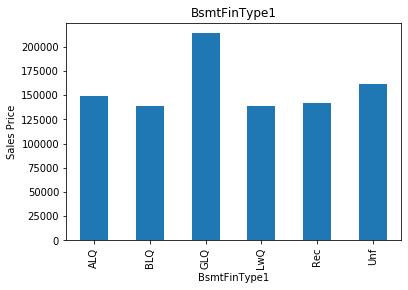

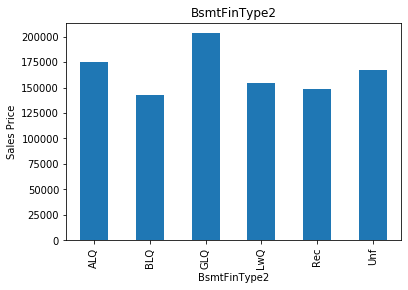

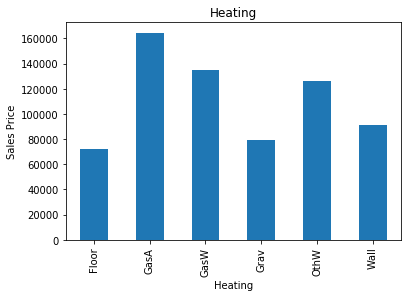

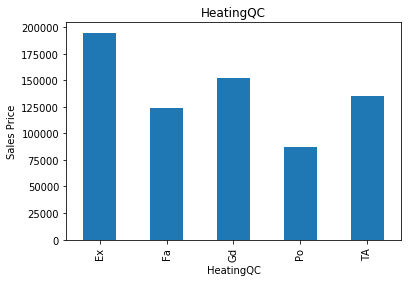

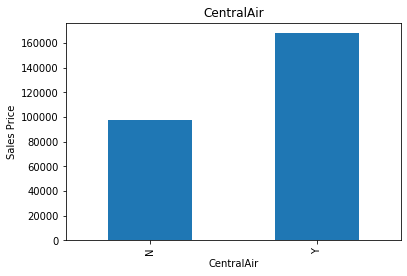

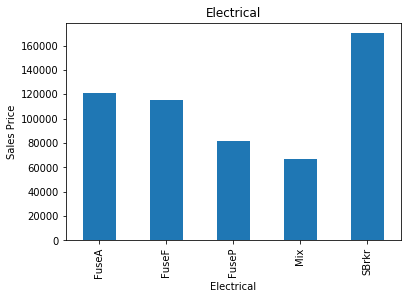

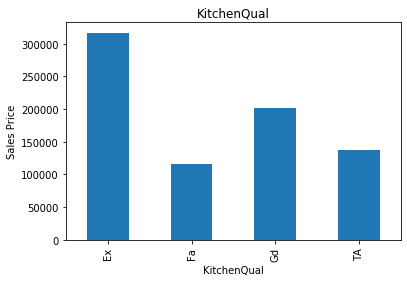

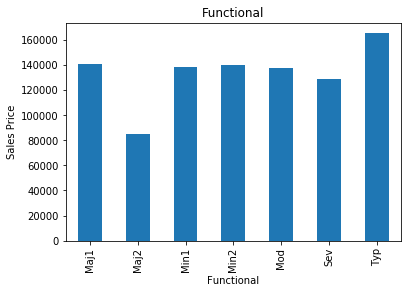

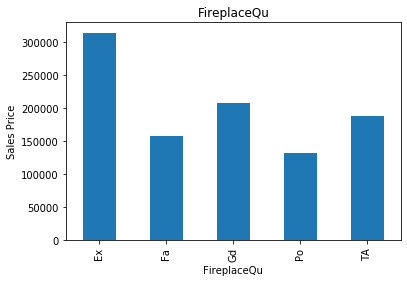

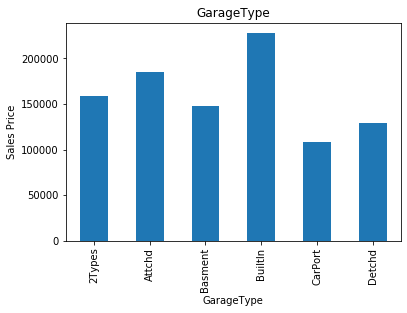

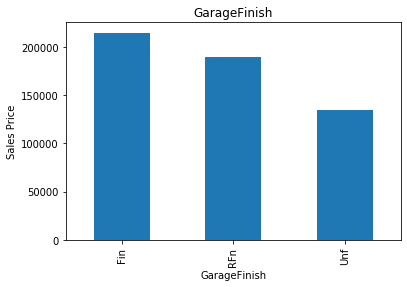

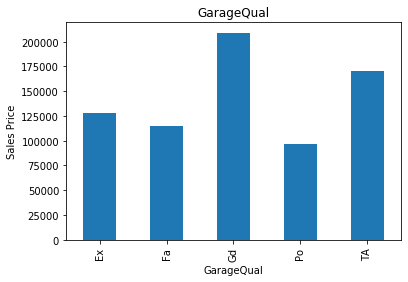

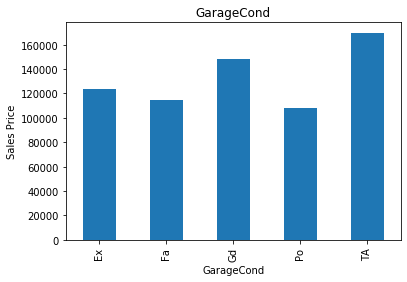

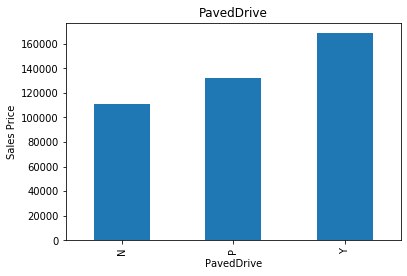

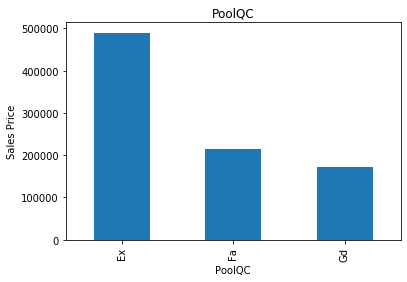

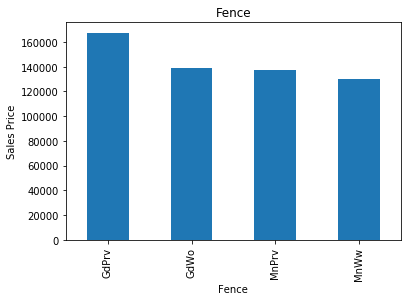

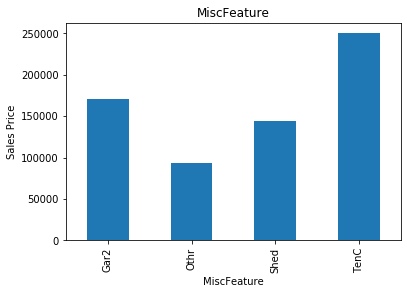

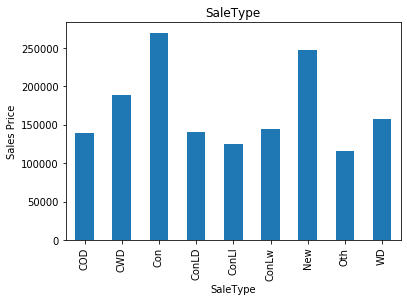

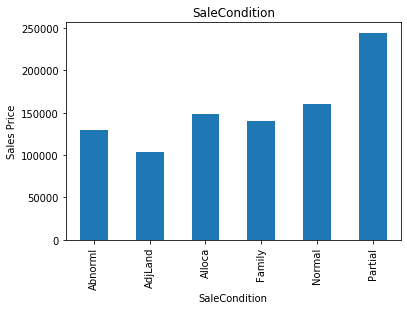

In [65]:
for feature in categorical_features:
    dataset = data.copy()
    
    dataset.groupby(feature)['SalePrice'].median().plot.bar()
    
    plt.xlabel(feature)
    plt.ylabel("Sales Price")
    plt.title(feature)
    plt.show()

## 1) d.   Outliers 

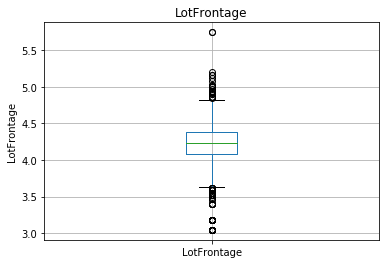

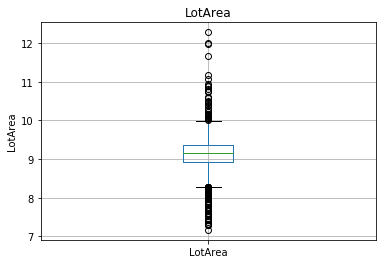

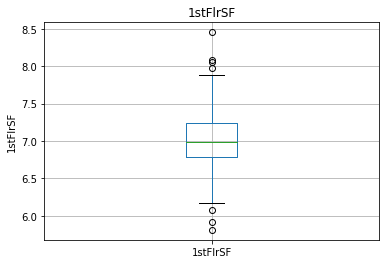

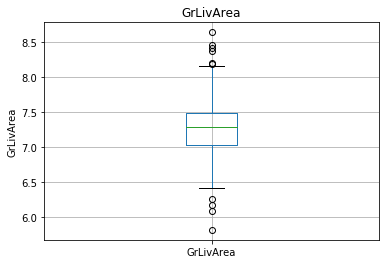

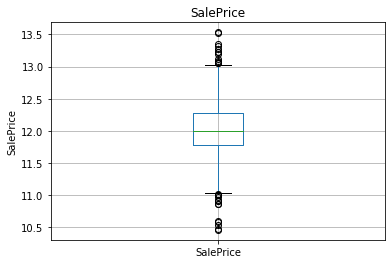

In [70]:
for feature in continous_feature:
    dataset = data.copy()
    
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature] =np.log(dataset[feature])
        dataset.boxplot(column=feature)

        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

#### Data Analysis is completed for now. Lets move on to Feature Engineering phase.